<h1> Ajuste de Curva
<h3> Testes dos métodos implementados em C

In [1]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt
# Carrega a biblioteca
lib = ctypes.CDLL("./metodos.dll")

lib.minimos_quadrados.restype = ctypes.POINTER(ctypes.c_double)
lib.minimos_quadrados.argtypes = [ctypes.c_int, ctypes.c_int, ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double)]

lib.test_minimo_quadrados.restype = ctypes.c_double
lib.test_minimo_quadrados.argtypes = [ctypes.c_double, ctypes.POINTER(ctypes.c_double), ctypes.c_int]

lib.free_memory.restype = None
lib.free_memory.argtypes = [ctypes.c_void_p]

def test(grau, x_pontos, y_pontos):
    n = len(x_pontos)
    DoubleArrayType = ctypes.c_double * n

    x_c = DoubleArrayType(*x_pontos)
    y_c = DoubleArrayType(*y_pontos)

    coef = lib.minimos_quadrados(grau,n,x_c,y_c)

    xs = np.linspace(min(x_pontos) - 1, max(x_pontos) + 1, 100)
    ys = [lib.test_minimo_quadrados(float(xi), coef, n) for xi in xs]

    print(f"Coeficientes do polinômio de grau {grau}:")
    for i in range(grau+1):
        print(f"  a[{i}] = {coef[i]}")

    plt.clf() 

    plt.scatter(x_pontos, y_pontos, color='red', label='Dados Originais')

    plt.plot(xs, ys, color='black', label='Ajuste (Mínimos Quadrados)')

    lib.free_memory(coef)

    plt.legend()
    #plt.axis('equal')
    plt.grid(True)
    plt.show()


Coeficientes do polinômio de grau 2:
  a[0] = -2.0285714285714294
  a[1] = 1.0
  a[2] = 4.714285714285714


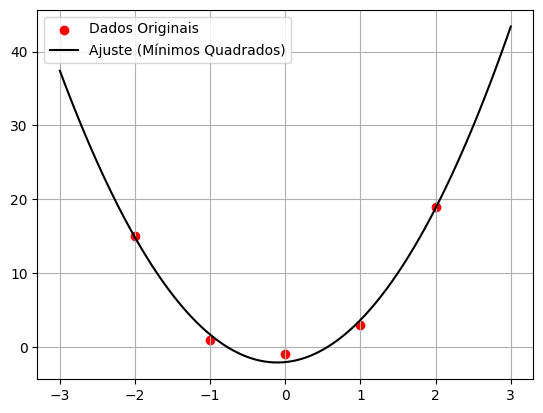

In [3]:
test(2,[ -2.0, -1.0,  0.0,  1.0,  2.0],[ 15.0,  1.0, -1.0,  3.0, 19.0])

Coeficientes do polinômio de grau 1:
  a[0] = 2.1500000000000004
  a[1] = 0.35


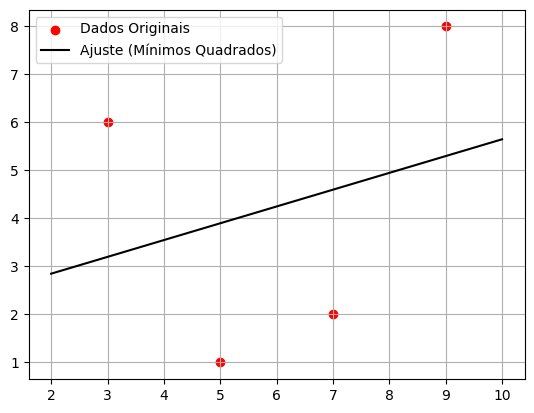

In [6]:
test(1,[7,9,5,3],[2,8,1,6])